In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [34]:
#read the CSV file into a dataframe
df= pd.read_csv('pG_picked_protein_group_no_remap_500.csv')

#select columns that you want to keep 
columns_to_keep=['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df) 
new_df.to_csv('ProteinIDs_picked_protein_group_no_remap_500_withScore.csv', index=False)

                                             Protein IDs   Q-value     Score
0          sp|Q9Y277|VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN  0.000248  4.000000
1      sp|Q92835|SHIP1_HUMAN;sp|Q92835-2|SHIP1_HUMAN;...  0.000248  4.000000
2                                  sp|Q15365|PCBP1_HUMAN  0.000248  4.000000
3      sp|Q86UP2|KTN1_HUMAN;sp|Q86UP2-2|KTN1_HUMAN;sp...  0.000248  4.000000
4      sp|P35579|MYH9_HUMAN;sp|A7E2Y1|MYH7B_HUMAN;sp|...  0.000248  4.000000
...                                                  ...       ...       ...
29590                        REV__sp|Q14831-5|GRM7_HUMAN  0.479068  0.304312
29591  REV__sp|Q9NSC5-2|HOME3_HUMAN;REV__sp|Q9NSC5-3|...  0.479070  0.302696
29592                            pI|c2riboseqorf50_HUMAN  0.479070  0.302060
29593                       REV__sp|Q6ISS4-2|LAIR2_HUMAN  0.479117  0.301630
29594                        REV__sp|Q8N884-2|CGAS_HUMAN  0.479119  0.301622

[29595 rows x 3 columns]


In [35]:
df = pd.read_csv('ProteinIDs_picked_protein_group_no_remap_500_withScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_picked_protein_group_no_remap_500_withScore.csv')

        Q-value Protein Type       Protein Uniprot  \
0      0.000248           sp                Q9Y277   
1      0.000248           sp                Q92835   
2      0.000248           sp                Q15365   
3      0.000248           sp                Q86UP2   
4      0.000248           sp                P35579   
...         ...          ...                   ...   
29590  0.479068      REV__sp              Q14831-5   
29591  0.479070      REV__sp              Q9NSC5-2   
29592  0.479070           pI  c2riboseqorf50_HUMAN   
29593  0.479117      REV__sp              Q6ISS4-2   
29594  0.479119      REV__sp              Q8N884-2   

                                           Protein Label  
0                    VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN  
1      SHIP1_HUMAN;sp|Q92835-2|SHIP1_HUMAN;sp|Q92835-...  
2                                            PCBP1_HUMAN  
3      KTN1_HUMAN;sp|Q86UP2-2|KTN1_HUMAN;sp|Q86UP2-3|...  
4      MYH9_HUMAN;sp|A7E2Y1|MYH7B_HUMAN;sp|P11055|MYH...

sp         16362
REV__sp     7200
REV__sR     1583
sR          1565
REV__pI     1187
pI          1170
sU           181
REV__sU      152
nC           110
REV__nC       85
Name: Protein Type, dtype: int64


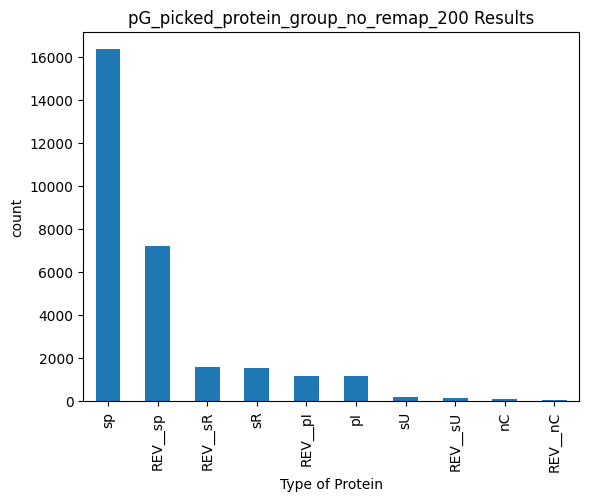

In [36]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_500_withScore.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap_500 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI        2
REV__sR        4
REV__sp       99
pI             7
sR             3
sU             2
sp         10535
Name: Protein Type, dtype: int64


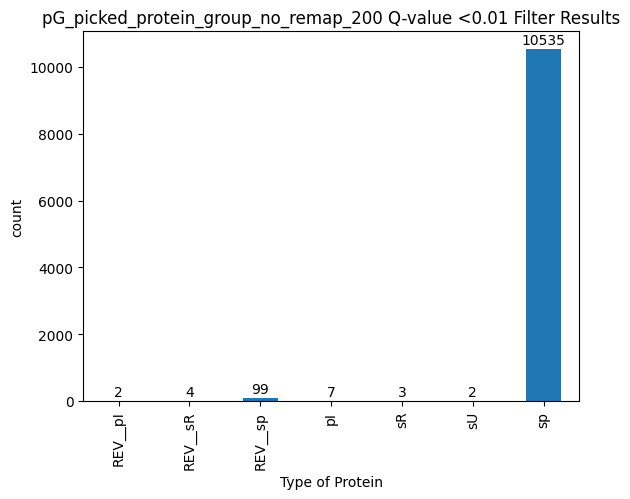

In [37]:
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_500_withScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap_500 Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [38]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI        2
REV__sR        4
REV__sp       99
pI             7
sR             3
sU             2
sp         10535
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      85
REV__pI    1185
REV__sR    1579
REV__sU     152
REV__sp    7101
nC          110
pI         1163
sR         1562
sU          179
sp         5827
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60709/2467272786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60709/2467272786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

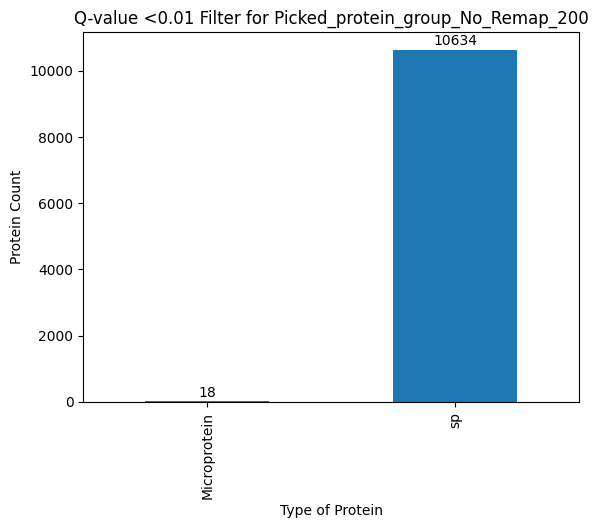

In [39]:

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Picked_protein_group_No_Remap_500')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

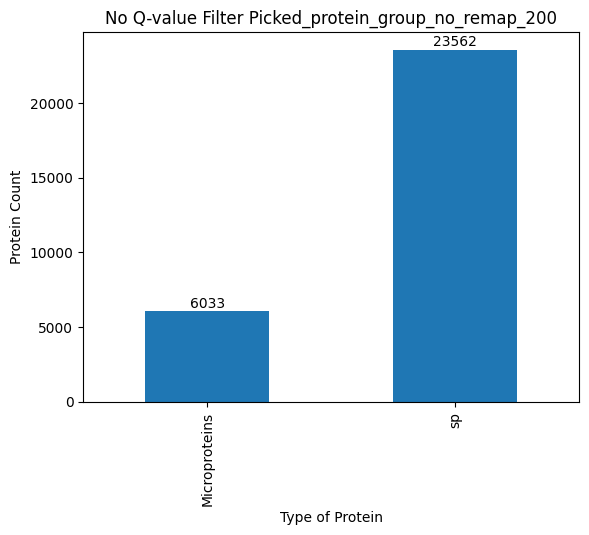

In [40]:
# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Picked_protein_group_no_remap_200')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()